In [3]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

# Set up Firefox options
firefox_options = Options()
firefox_options.add_argument("--headless")  # Run in headless mode (no browser UI)
firefox_options.add_argument("--no-sandbox")
firefox_options.add_argument("--disable-dev-shm-usage")

# Initialize the Firefox driver
driver = webdriver.Firefox(options=firefox_options)

# URL to scrape
url = "https://www.airbnb.com/s/Belo-Horizonte--MG/homes?refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&channel=EXPLORE&place_id=ChIJMyzPysqQpgARlznSOl55NVs&acp_id=8949c462-3712-48e3-8bed-185932a32fe1&date_picker_type=calendar&source=structured_search_input_header&search_type=user_map_move&query=Belo%20Horizonte%2C%20MG&search_mode=regular_search&price_filter_num_nights=1&ne_lat=-19.762079585687626&ne_lng=-43.924126024396315&sw_lat=-19.837703838936648&sw_lng=-43.99818231236125&zoom=12.883832463880852&zoom_level=12.883832463880852&search_by_map=true&checkin=2025-03-01&checkout=2025-03-02&monthly_start_date=2025-04-01&monthly_length=3&monthly_end_date=2025-07-01"

# Navigate to the URL
driver.get(url)

# Wait for the page to load
time.sleep(5)

# Wait for listings to appear
wait = WebDriverWait(driver, 10)
listings = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div[itemprop='itemListElement']")))

# Initialize lists to store data
names = []
prices = []
ratings = []
details = []

# Extract information from each listing
for listing in listings:
    try:
        # Get listing name
        name = listing.find_element(By.CSS_SELECTOR, "meta[itemprop='name']").get_attribute("content")
        names.append(name)
    except:
        names.append("N/A")
    
    try:
        # Get price
        price = listing.find_element(By.CSS_SELECTOR, "span._hb913q").text
        prices.append(price)
    except:
        prices.append("N/A")
    
    try:
        # Get rating
        rating = listing.find_element(By.CSS_SELECTOR, "span[aria-label*='rated']").get_attribute("aria-label")
        ratings.append(rating)
    except:
        ratings.append("N/A")
    
    try:
        # Get details (beds, bedrooms, etc.)
        detail = listing.find_element(By.CSS_SELECTOR, "div[data-testid='listing-card-subtitle']").text
        details.append(detail)
    except:
        details.append("N/A")

# Create a DataFrame
airbnb_data = pd.DataFrame({
    'Name': names,
    'Price': prices,
    'Rating': ratings,
    'Details': details
})

# Display the data
print(f"Found {len(airbnb_data)} listings")
airbnb_data.head()

# Close the browser
driver.quit()



TimeoutException: Message: 


In [4]:
print(airbnb_data)

                                                 Name   Price Rating  \
0    Suite w/5-seat hydromassage,TV 75”w/sound cinema  R$342     N/A   
1              housespacebh(HEATED 35 DEGREES COVERED  R$643     N/A   
2                          Apto Floramar/Green plants  R$122     N/A   
3    Studio Enchantador in Belo Horizonte com Garagem  R$114     N/A   
4         Duplex MIAMI (Coverage) Administrative City   R$71     N/A   
5   Apto.Ótima Localiz. Prox.CenterMinas CidAdmin,...  R$132     N/A   
6     Aconchegante ap 500 meters da Lagoa da Pampulha  R$132     N/A   
7                                       Aurora Refuge  R$210     N/A   
8   GORGEOUS AP 800 METERS FROM THE LAGOON, NEAR UFMG  R$137     N/A   
9   Best Reception and Fine Tract is in the Nardél...   R$97     N/A   
10                                  Casa Santa Monica  R$171     N/A   
11      House Pampulha Sell New Air Conditioning Wifi  R$103     N/A   
12                      Apt Nex Pampulha Sell New Wif   R$92    

In [13]:
url = "https://www.airbnb.com/rooms/49840035?check_in=2025-04-02&check_out=2025-04-03"  # Reduced URL with only check-in and check-out dates


In [14]:


# Set up Firefox options
firefox_options = Options()
firefox_options.add_argument("--headless")  # Run in headless mode (no browser UI)
firefox_options.add_argument("--no-sandbox")
firefox_options.add_argument("--disable-dev-shm-usage")
firefox_options.add_argument("--window-size=1920,1080")  # Set window size

# Initialize the Firefox driver
driver = webdriver.Firefox(options=firefox_options)


try:
    # Navigate to the URL
    driver.get(url)

    # Wait longer for the page to load
    print("Waiting for page to load...")
    time.sleep(2)

    # Create a dictionary to store listing data
    listing_data = {}
    
    # Get listing title
    try:
        title_element = driver.find_element(By.CSS_SELECTOR, "h1")
        listing_data['title'] = title_element.text
    except Exception as e:
        listing_data['title'] = "N/A"
    
    # Get price
    try:
        # Try multiple possible price selectors
        price_selectors = [
            "span._hb913q", 
            "span._tyxjp1",  # Adding this selector based on the image
            "span[data-testid='price-element']",
            "div._1k4xcdh span",  # Common price container
            "span._1k4xcdh",      # Direct span with class _1k4xcdh
            "div._1qs94rc span"   # Another common price container
        ]
        
        price_found = False
        for selector in price_selectors:
            try:
                price_elements = driver.find_elements(By.CSS_SELECTOR, selector)
                for element in price_elements:
                    if element.text and "$" in element.text:
                        listing_data['price'] = element.text
                        price_found = True
                        break
                if price_found:
                    break
            except:
                continue
                
        if not price_found:
            # Last resort: look for any element containing a dollar sign
            elements = driver.find_elements(By.XPATH, "//*[contains(text(), '$')]")
            if elements:
                listing_data['price'] = elements[0].text
            else:
                listing_data['price'] = "N/A"
    except Exception as e:
        print(f"Error getting price: {e}")
        listing_data['price'] = "N/A"
    
    # Get bedrooms
    try:
        bedroom_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bedroom')")
        listing_data['bedrooms'] = bedroom_element.text.strip()
    except Exception as e:
        try:
            # Alternative selector
            bedroom_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
            for element in bedroom_elements:
                if "bedroom" in element.text:
                    listing_data['bedrooms'] = element.text.strip()
                    break
            else:
                listing_data['bedrooms'] = "N/A"
        except:
            listing_data['bedrooms'] = "N/A"
    
    # Get beds
    try:
        bed_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bed')")
        listing_data['beds'] = bed_element.text.strip()
    except Exception as e:
        try:
            # Alternative selector
            bed_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
            for element in bed_elements:
                if "bed" in element.text and "bedroom" not in element.text:
                    listing_data['beds'] = element.text.strip()
                    break
            else:
                listing_data['beds'] = "N/A"
        except:
            listing_data['beds'] = "N/A"
    
    # Get bathrooms
    try:
        bath_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bath')")
        listing_data['bathrooms'] = bath_element.text.strip()
    except Exception as e:
        try:
            # Alternative selector
            bath_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
            for element in bath_elements:
                if "bath" in element.text:
                    listing_data['bathrooms'] = element.text.strip()
                    break
            else:
                listing_data['bathrooms'] = "N/A"
        except:
            listing_data['bathrooms'] = "N/A"
    
    # Create a DataFrame with the single listing
    listing_df = pd.DataFrame([listing_data])
    
    # Display the data
    print("Listing Information:")
    print(listing_df)
    
except Exception as e:
    print(f"An error occurred: {e}")
    # Take a screenshot to help debug
    try:
        driver.save_screenshot("airbnb_error.png")
        print("Screenshot saved as airbnb_error.png")
    except:
        print("Could not save screenshot")

finally:
    # Close the browser
    driver.quit()

Waiting for page to load...
Listing Information:
                                               title price     bedrooms  \
0  Cabana do Sossego Refugio na Serra da Mantique...        · 1 bedroom   

      beds bathrooms  
0  · 1 bed  · 1 bath  


In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

In [10]:
url = "https://www.airbnb.com/rooms/49840035?check_in=2025-04-02&check_out=2025-04-03"  # Reduced URL with only check-in and check-out dates

In [27]:
def scrape_airbnb_listing(url, check_in_date=None, check_out_date=None):
    """
    Scrape an Airbnb listing and return the data as a DataFrame.
    
    Args:
        url (str): The URL of the Airbnb listing
        check_in_date (str, optional): Check-in date in format 'YYYY-MM-DD'
        check_out_date (str, optional): Check-out date in format 'YYYY-MM-DD'
        
    Returns:
        pandas.DataFrame: DataFrame containing the listing information
    """
    # Set up Firefox options
    firefox_options = Options()
    firefox_options.add_argument("--headless")  # Run in headless mode (no browser UI)
    firefox_options.add_argument("--no-sandbox")
    firefox_options.add_argument("--disable-dev-shm-usage")
    firefox_options.add_argument("--window-size=1920,1080")  # Set window size

    # Initialize the Firefox driver
    driver = webdriver.Firefox(options=firefox_options)
    
    # Modify URL if dates are provided
    if check_in_date and check_out_date:
        if '?' in url:
            url += f"&check_in={check_in_date}&check_out={check_out_date}"
        else:
            url += f"?check_in={check_in_date}&check_out={check_out_date}"
    
    try:
        # Navigate to the URL
        #print(url)
        driver.get(url)

        # Wait longer for the page to load
        #print("Waiting for page to load...")
        time.sleep(2)

        # Create a dictionary to store listing data
        listing_data = {}
        
        # Get listing title
        try:
            title_element = driver.find_element(By.CSS_SELECTOR, "h1")
            listing_data['title'] = title_element.text
        except Exception as e:
            listing_data['title'] = "N/A"
        
        # Get price
        try:
            # Try multiple possible price selectors
            price_selectors = [
                "span._hb913q", 
                "span._tyxjp1",  # Adding this selector based on the image
                "span[data-testid='price-element']",
                "div._1k4xcdh span",  # Common price container
                "span._1k4xcdh",      # Direct span with class _1k4xcdh
                "div._1qs94rc span"   # Another common price container
            ]
            
            price_found = False
            for selector in price_selectors:
                try:
                    price_elements = driver.find_elements(By.CSS_SELECTOR, selector)
                    for element in price_elements:
                        if element.text and "$" in element.text:
                            listing_data['price'] = element.text
                            price_found = True
                            break
                    if price_found:
                        break
                except:
                    continue
                    
            if not price_found:
                # Last resort: look for any element containing a dollar sign
                elements = driver.find_elements(By.XPATH, "//*[contains(text(), '$')]")
                if elements:
                    listing_data['price'] = elements[0].text
                else:
                    listing_data['price'] = "N/A"
        except Exception as e:
            print(f"Error getting price: {e}")
            listing_data['price'] = "N/A"
        
        # Get bedrooms
        try:
            bedroom_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bedroom')")
            listing_data['bedrooms'] = bedroom_element.text.strip()
        except Exception as e:
            try:
                # Alternative selector
                bedroom_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
                for element in bedroom_elements:
                    if "bedroom" in element.text:
                        listing_data['bedrooms'] = element.text.strip()
                        break
                else:
                    listing_data['bedrooms'] = "N/A"
            except:
                listing_data['bedrooms'] = "N/A"
        
        # Get beds
        try:
            bed_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bed')")
            listing_data['beds'] = bed_element.text.strip()
        except Exception as e:
            try:
                # Alternative selector
                bed_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
                for element in bed_elements:
                    if "bed" in element.text and "bedroom" not in element.text:
                        listing_data['beds'] = element.text.strip()
                        break
                else:
                    listing_data['beds'] = "N/A"
            except:
                listing_data['beds'] = "N/A"
        
        # Get bathrooms
        try:
            bath_element = driver.find_element(By.CSS_SELECTOR, "li.l7n4lsf:contains('bath')")
            listing_data['bathrooms'] = bath_element.text.strip()
        except Exception as e:
            try:
                # Alternative selector
                bath_elements = driver.find_elements(By.CSS_SELECTOR, "li.l7n4lsf")
                for element in bath_elements:
                    if "bath" in element.text:
                        listing_data['bathrooms'] = element.text.strip()
                        break
                else:
                    listing_data['bathrooms'] = "N/A"
            except:
                listing_data['bathrooms'] = "N/A"
        
        # Add check-in and check-out dates to the data if provided
        if check_in_date:
            listing_data['check_in_date'] = check_in_date
        if check_out_date:
            listing_data['check_out_date'] = check_out_date
            
        # Add timestamp for when the data was collected
        listing_data['scrape_timestamp'] = pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
        
        # Create a DataFrame with the single listing
        listing_df = pd.DataFrame([listing_data])
        
        return listing_df
        
    except Exception as e:
        print(f"An error occurred: {e}")
        # Take a screenshot to help debug
        try:
            driver.save_screenshot("airbnb_error.png")
            print("Screenshot saved as airbnb_error.png")
        except:
            print("Could not save screenshot")
        return pd.DataFrame()  # Return empty DataFrame on error

    finally:
        # Close the browser
        driver.quit()

# Example usage:
url = "https://www.airbnb.com/rooms/1226838394368528887"
df = scrape_airbnb_listing(url, "2025-05-01", "2025-05-02")
print(df)

                                               title   price     bedrooms  \
0  Beautiful and sophisticated studio great location  R$310   · 1 bedroom   

       beds bathrooms check_in_date check_out_date     scrape_timestamp  
0  · 2 beds  · 1 bath    2025-05-01     2025-05-02  2025-03-07 09:23:34  


In [ ]:


# To monitor price changes over time:
def monitor_listing_price(url, year_month, interval_days=1):
    """
    Monitor an Airbnb listing price and availability for an entire month.
    
    Args:
        url (str): The URL of the Airbnb listing
        year_month (str): Year and month in format 'YYYY-MM'
        interval_days (int): Days between checks to avoid rate limiting
        
    Returns:
        pandas.DataFrame: DataFrame containing price and availability history
    """
    results = []
    
    # Parse the year and month
    year, month = map(int, year_month.split('-'))
    
    # Get the number of days in the specified month
    import calendar
    num_days = calendar.monthrange(year, month)[1]
    
    # Generate all date pairs for the month (each stay is 1 night)
    for day in range(1, num_days):
        check_in = f"{year}-{month:02d}-{day:02d}"
        check_out = f"{year}-{month:02d}-{day+1:02d}"
        
        # Scrape the listing for this date pair
        print(f"Scraping listing for {check_in}")
        df = scrape_airbnb_listing(url, check_in, check_out)
        
        # Create a data entry regardless of whether scraping succeeded
        data_entry = {
            'date': check_in,
            'available': df['price'].empty,
            'url': url
        }
        
        # If we got data, add the price
        if not df.empty:
            data_entry['price'] = df['price'].iloc[0] if 'price' in df.columns else 'N/A'
            # Add any other data from the scraped listing
            for col in df.columns:
                if col not in data_entry:
                    data_entry[col] = df[col].iloc[0]
        else:
            data_entry['price'] = 'N/A'
        
        # Add to results
        results.append(data_entry)
        
        # Pause between requests to avoid rate limiting
        time.sleep(0.5)  # 2 seconds between requests
    
    # Create DataFrame from results
    result_df = pd.DataFrame(results)
    
    return result_df

# Example usage:
df = monitor_listing_price("https://www.airbnb.com/rooms/1226838394368528887", "2025-04")

Scraping listing for 2025-04-01
Scraping listing for 2025-04-02
Scraping listing for 2025-04-03
Scraping listing for 2025-04-04
Scraping listing for 2025-04-05
Scraping listing for 2025-04-06
Scraping listing for 2025-04-07
Scraping listing for 2025-04-08
Scraping listing for 2025-04-09
Scraping listing for 2025-04-10
Scraping listing for 2025-04-11
Scraping listing for 2025-04-12
Scraping listing for 2025-04-13
Scraping listing for 2025-04-14
Scraping listing for 2025-04-15
Scraping listing for 2025-04-16
Scraping listing for 2025-04-17
Scraping listing for 2025-04-18
Scraping listing for 2025-04-19
Scraping listing for 2025-04-20
Scraping listing for 2025-04-21
Scraping listing for 2025-04-22
Scraping listing for 2025-04-23
Scraping listing for 2025-04-24
Scraping listing for 2025-04-25
Scraping listing for 2025-04-26
Scraping listing for 2025-04-27
Scraping listing for 2025-04-28
Scraping listing for 2025-04-29


0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
Name: available, dtype: bool


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

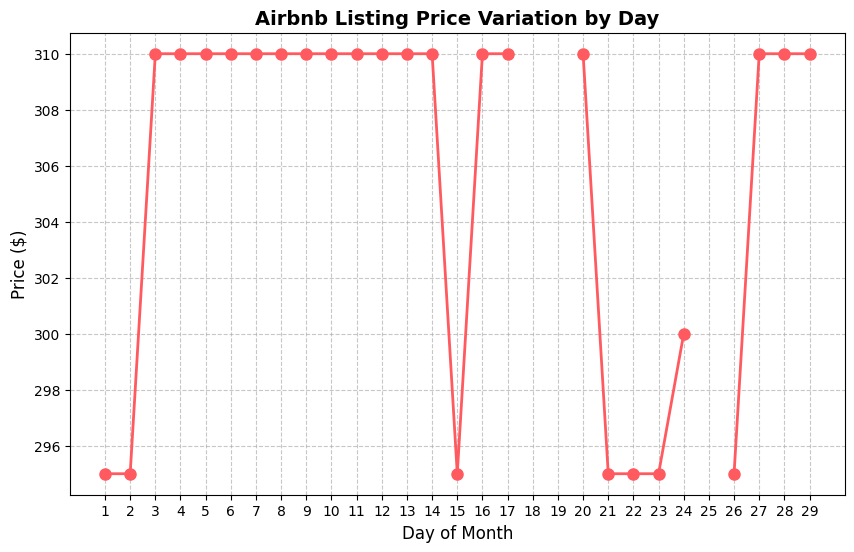

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Extract day from check_in_date for x-axis
days = df['check_in_date'].str[-2:].astype(int)

# Convert prices to numeric, removing any currency symbols
prices = [float(price) if price != '' else None for price in df['price'].str[2:]]

# Create the plot with improved styling
plt.figure(figsize=(10, 6))
plt.plot(days, prices, marker='o', linestyle='-', linewidth=2, markersize=8, color='#FF5A5F')

# Add labels and title
plt.xlabel('Day of Month', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Airbnb Listing Price Variation by Day', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Format the x-axis to show all days
plt.xticks(days)

# Tight layout for better spacing
print(df['available'])
plt.tight_layout

In [69]:

print([float(price) if price != '' else None for price in df['price'].str[2:]])

[295.0, 295.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 310.0, 295.0, 310.0, 310.0, None, None, 310.0, 295.0, 295.0, 295.0, 300.0, None, 295.0, 310.0, 310.0, 310.0]
